## Hospital Death Cases: Yearly Data


### Import statements

In [364]:
###  Import statements
import pandas as pd
import plotly.express as px


In [365]:
## Importing the datast
df = pd.read_csv("annual_deaths_by_clinic.csv", quotechar="'")          ## Removes the characters
df.sample(5)

,year,births,deaths,clinic
4,1845,3492,241,clinic 1
10,1845,3241,66,clinic 2
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
9,1844,2956,68,clinic 2


### Intial adjustment of the dataset

In [366]:
## Checks fort columns, shape, head, and types
df.head()               ## Starts at 1841.
df.tail()               ## Two clinics

df.columns              ## Want to get it pascal case to make it easier
df.dtypes               ## Years need to be converted, Check clinic if its a string or not
df.shape

#=================================Adjustments==================================#
        # Adjusting column names
df.rename(columns={"year":"Year",
                   "births":"Births",
                   "deaths":"Deaths",
                   "clinic":"Clinic", },
         inplace=True)

        ## Adjusting the data type
df["Year"]= df["Year"].astype(str)                          # Convert it into string so the nanosecond problem does not apply
df["Year"]= pd.to_datetime(df["Year"],errors="coerce" )     # Convert everything but dont crash if it does not work
df["Year"]= df["Year"].dt.year



In [367]:
## Adjust the non-necessary columns, duplicated values and the role of missing values

    ## Checks for the columns to be dropped # No columns need to be dropped

    ## Checks for duplicated values
df.duplicated(subset =["Year","Clinic"], keep=False).sum()        # There are no identical values since the duplicated functions comes up as 0.
                                                                  # Subset looks at specific columns
                                                                  #Keep = false keeps all the duplicated values as true. So need to use sort values
    ## Checks for missing values
df.isna().sum()                             # no  missing values in the categories.

Year      0
Births    0
Deaths    0
Clinic    0
dtype: int64

### Descriptive statistics for the categories

In [368]:
df.describe()


,Year,Births,Deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


### Visualizing the Data

Which clinic is bigger or more busy judging by the number of births?

Has the hospital had more patients over time?

What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [369]:
chart = px.line( df,
                 x= "Year",
                 y= "Births",
                 color="Clinic", )
chart.update_layout(
    title = "Annual Births  by Clinic", )
chart.show()

In [370]:
chart = px.line( df,
                 x= "Year",
                 y= "Deaths" ,
                 color="Clinic", )
chart.update_layout(
    title = "Annual Deaths  by Clinic", )
chart.show()

Challenge 2: Calculate the Proportion of Deaths at Each Clinic
Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.

Work out the percentage of deaths for each row in the df_yearly DataFrame by adding a column called "pct_deaths".

Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).

Create another plotly line chart to see how the percentage varies year over year with the two different clinics.

Which clinic has a higher proportion of deaths

In [371]:
# deaths per year for each clinics
df["Pct_Deaths"]= df["Deaths"]/df["Births"]


# average deaths per clinic
clinic_1 = df[df["Clinic"]=="clinic 1"]
clinic_2 = df[df["Clinic"]=="clinic 2"]

    # Averages per clinic
average_clinic_1 = (clinic_1["Deaths"].sum()/clinic_1["Births"].sum())*100
average_clinic_2 = (clinic_2["Deaths"].sum()/clinic_2["Births"].sum())*100
print(f'Average death rate in clinic 1 is {average_clinic_1:.3}%.')
print(f'Average death rate in clinic 2 is {average_clinic_2:.3}%.')

Average death rate in clinic 1 is 9.92%.
Average death rate in clinic 2 is 3.88%.


In [372]:
line = px.line(df,
               x='Year',
               y='Pct_Deaths',
               color='Clinic',
               title='Proportion of Yearly Deaths by Clinic')

line.show()

## Hospital Death Cases: Monthly Data


### Import statements

In [373]:
## import statements
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [374]:
m_df= pd.read_csv("monthly_deaths.csv")
m_df.sample(5)

,date,births,deaths
44,1844-10-01,248,8
4,1841-05-01,255,2
63,1846-05-01,305,41
53,1845-07-01,245,15
56,1845-10-01,283,42


### Inital checks

In [375]:
# checks for head, tail, dtypes, columns , and shape
m_df.head()
m_df.tail()
m_df.columns                        # Need to adjust the names
m_df.dtypes                         # Dates need to be adjsted again

#=======================Adjustments================================#
m_df.rename(columns={"date":"Date",
                     "births":"Births",
                     "deaths":"Deaths",},
            inplace= True)

m_df["Date"]= pd.to_datetime(m_df["Date"], errors="coerce" )
# m_df["Date"] = m_df["Date"].dt.to_period("M")          # Gives it to me as date and month format-- through the datetime object not datetime index
m_df["Date"]

0    1841-01-01
1    1841-02-01
2    1841-03-01
3    1841-04-01
4    1841-05-01
        ...    
93   1848-11-01
94   1848-12-01
95   1849-01-01
96   1849-02-01
97   1849-03-01
Name: Date, Length: 98, dtype: datetime64[ns]

In [376]:
## checks to remove columns, duplicated values, and missing values

        ## removing columns
                                    ##  no need to remove
        ## check for duplicated values
index = m_df.duplicated(subset =["Date","Births", "Deaths"], keep=False)
m_df[index]                         ## This is where you would apply the ordering to get the correct order


        ## checks for mising values
m_df.isna().sum()                   ## No missing values

Date      0
Births    0
Deaths    0
dtype: int64

### Descriptive statistics

In [377]:
m_df.describe()

,Date,Births,Deaths
count,98,98.000000,98.000000
mean,1845-02-11 04:24:29.387755008,267.000000,22.469388
min,1841-01-01 00:00:00,190.000000,0.000000
25%,1843-02-08 00:00:00,242.500000,8.000000
50%,1845-02-15 00:00:00,264.000000,16.500000
75%,1847-02-22 00:00:00,292.750000,36.750000
max,1849-03-01 00:00:00,406.000000,75.000000
std,NaN,41.769372,18.141031


### Analysis

Add a column called "pct_deaths" to df_monthly that has the percentage of deaths per birth for each row.

Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.

Calculate the average death rate prior to June 1846.

Calculate the average death rate after June 1846.

In [378]:
# column called pct deaths
m_df["Pct_Deaths"]=  m_df["Deaths"]/m_df["Births"]


# spearate before and aftyer handwashing
handwashing_date = "1846-06-01"


before_handwashing  =  m_df[m_df["Date"]<handwashing_date].copy()
after_handwashing  = m_df[m_df["Date"]>=handwashing_date].copy()

            # Before handwashing deaths
mean_before = before_handwashing["Deaths"].mean()
mean_after  = after_handwashing["Deaths"].mean()

print (f" The before handwashing deaths was at {mean_before:.3}% and the after handwashing deaths was at {mean_after:.3}%. ")

 The before handwashing deaths was at 26.8% and the after handwashing deaths was at 14.3%. 


Create a DataFrame that has the 6-month rolling average death rate prior to mandatory handwashing.

Hint: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation

In [394]:
# Setting the column as the index
# m_df.set_index("Date", inplace=True)
# before_handwashing.set_index("Date", inplace=True)
# after_handwashing.set_index("Date", inplace=True)

before_handwashing["Rolling"]= before_handwashing["Pct_Deaths"].rolling(window= 6).mean()           # Create a copyu earlier and then adjust
after_handwashing["Rolling"]= after_handwashing["Pct_Deaths"].rolling(window=6).mean()

In [396]:
after_handwashing

,Births,Deaths,Pct_Deaths,Rolling
Date,,,,
1846-06-01,266,27,0.101504,NaN
1846-07-01,252,33,0.130952,NaN
1846-08-01,216,39,0.180556,NaN
1846-09-01,271,39,0.143911,NaN
1846-10-01,254,38,0.149606,NaN
1846-11-01,297,32,0.107744,0.135712
1846-12-01,298,16,0.053691,0.127744
1847-01-01,311,10,0.032154,0.111277
1847-02-01,312,6,0.019231,0.084390


Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

Add 3 separate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.

Show the monthly death rate before handwashing as a thin dashed black line.

Show the moving average as a thicker, crimson line.

Show the rate after handwashing as a skyblue line with round markers.

Look at the code snippet in the documentation to see how you can add a legend to the chart.

In [399]:
before_handwashing.index= before_handwashing.index.astype(str)
after_handwashing.index =after_handwashing.index.astype(str)
before_handwashing.index = pd.to_datetime(before_handwashing.index)
after_handwashing.index = pd.to_datetime(after_handwashing.index)

before_handwashing.index.dtype

dtype('<M8[ns]')

In [391]:
before_handwashing

,Births,Deaths,Pct_Deaths,Rolling
Date,,,,
1841-01-01,254,37,0.145669,NaN
1841-02-01,239,18,0.075314,NaN
1841-03-01,277,12,0.043321,NaN
1841-04-01,255,4,0.015686,NaN
1841-05-01,255,2,0.007843,NaN
...,...,...,...,...
1846-01-01,336,45,0.133929,0.106331
1846-02-01,293,53,0.180887,0.130502
1846-03-01,311,48,0.154341,0.138645


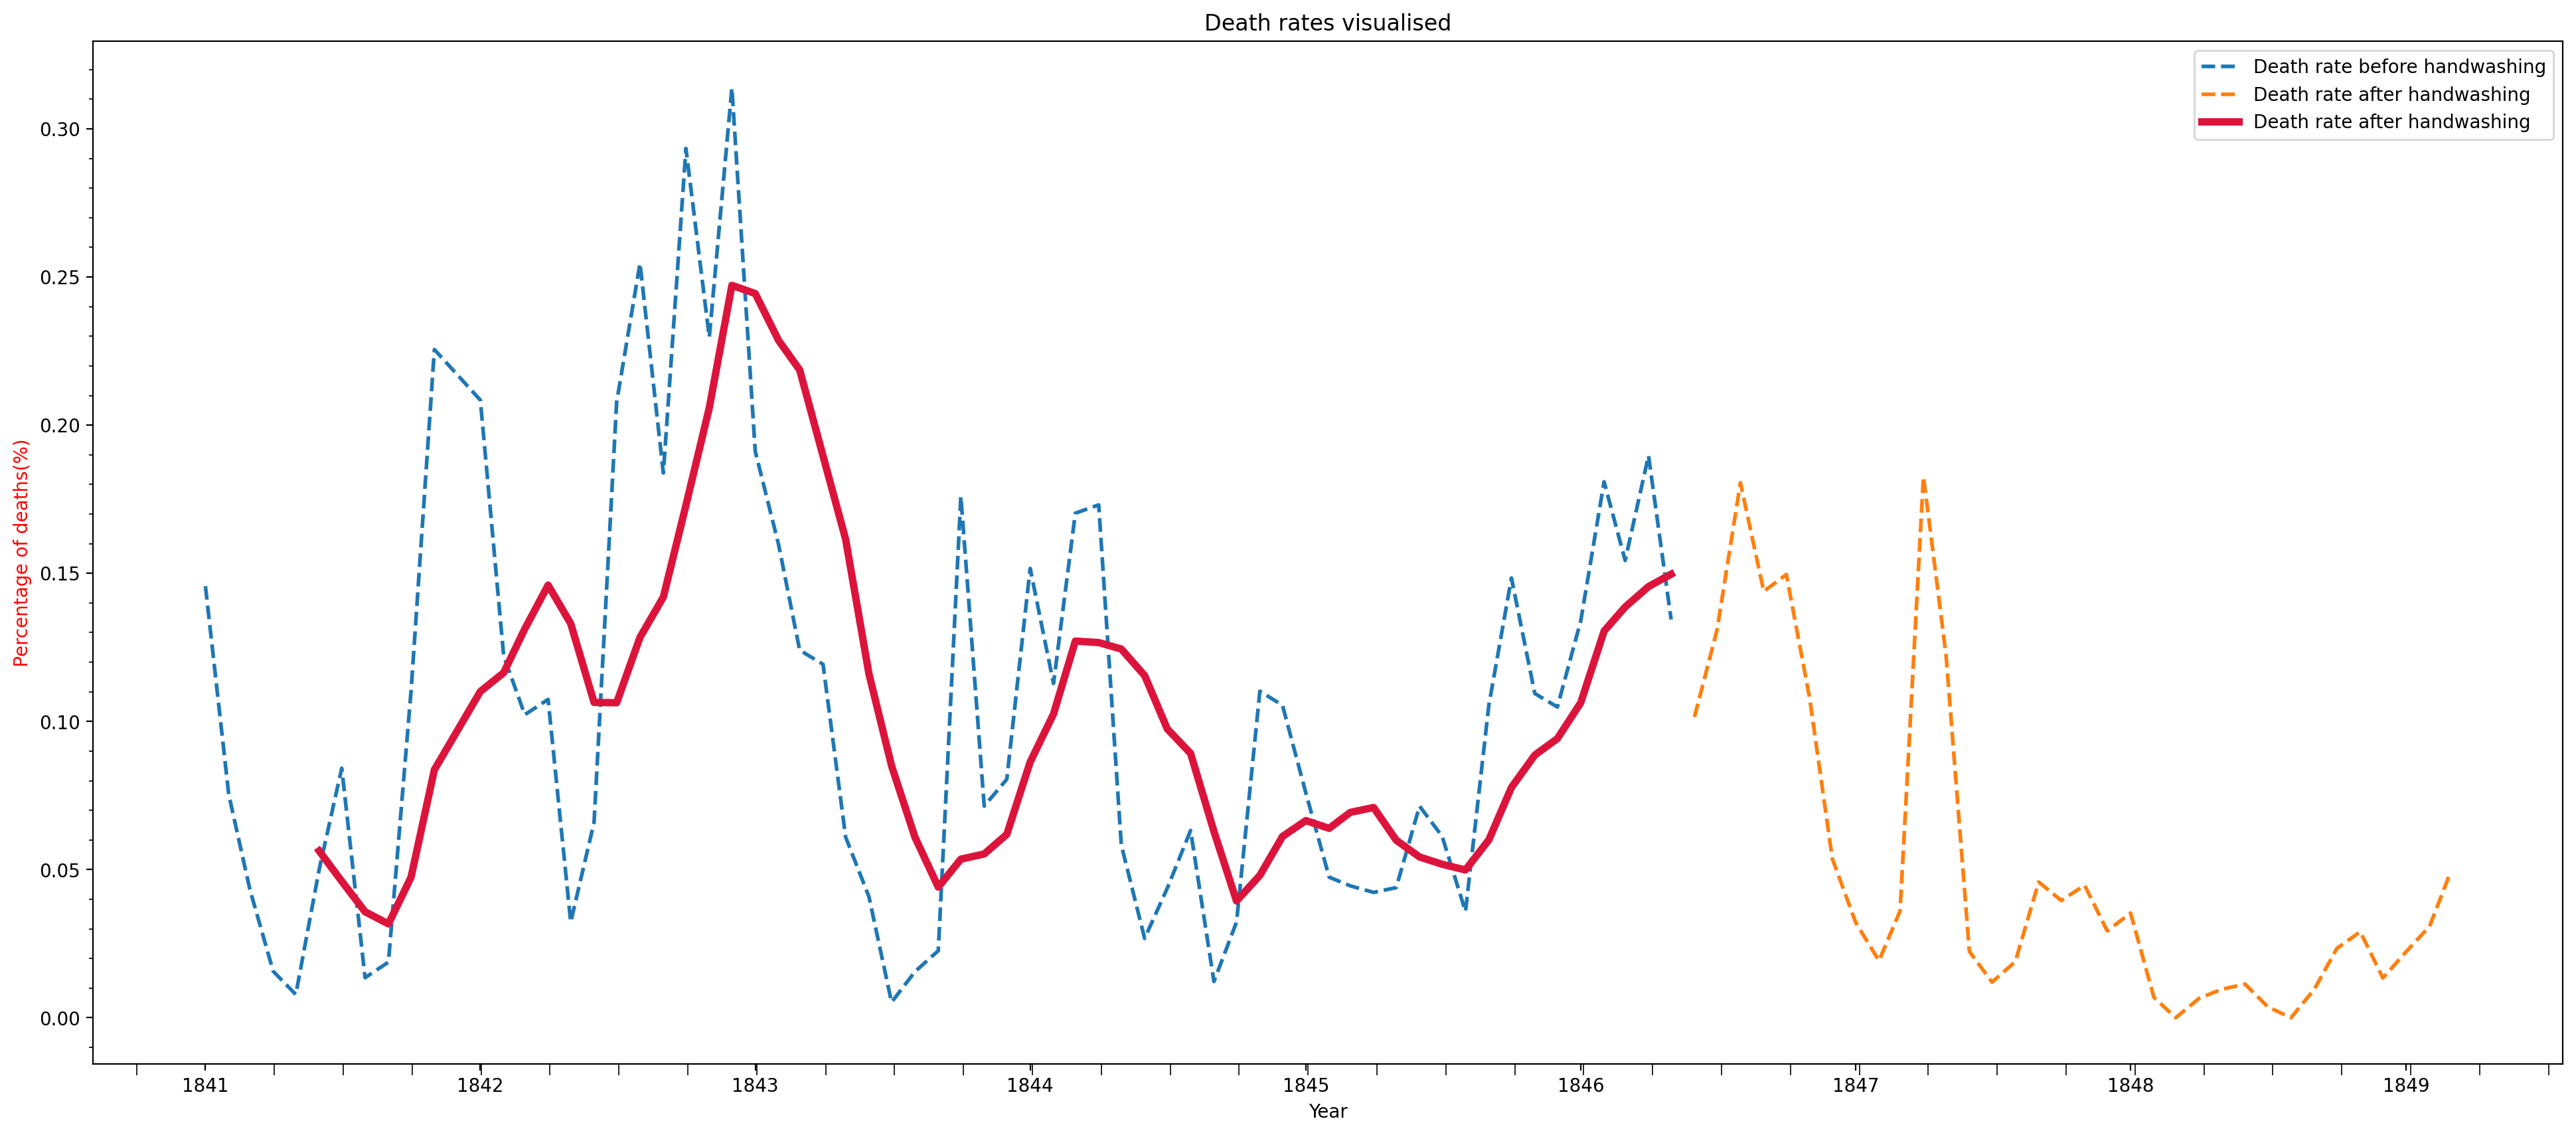

In [411]:
plt.style.use('default')
## Figure size etc
plt.figure(figsize =(24, 10), dpi= 200)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()

## Tick locators
years= mdates.YearLocator()                                     # Fidn the years
months= mdates.MonthLocator()                                   # Find the months
years_FMT= mdates.DateFormatter('%Y')                           # Format them

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))     # Gives the minor locators in intervals
ax.xaxis.set_major_formatter(years_FMT)
# ax.xaxis.set_minor_locator(months)                            # General minor locator behaviour
ax.minorticks_on()                                              # Making sure the minor ticks are on
ax.tick_params(axis='x', which='minor', color='black', length=6)# styling for minor locator

## charts
chart= plt.plot(before_handwashing.index,
                 before_handwashing["Pct_Deaths"],
                linewidth = 2,
                linestyle = "--",
                label ="Death rate before handwashing",)
chart= plt.plot(after_handwashing.index,
                after_handwashing["Pct_Deaths"],
                linewidth = 2,
                linestyle = "--",
                label ="Death rate after handwashing",)

chart= plt.plot(before_handwashing.index,
                before_handwashing["Rolling"],
                linewidth = 4,
                linestyle = "-",
                label ="Death rate after handwashing",
                color= "crimson",)



plt.grid(False)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage of deaths(%)", color='Red')
plt.title("Death rates visualised")
plt.show()


